### **Handwritten Digits Classification using Neural Network**
**Keras**

Keras is an open-source software library for artificial neural networks. Keras acts as an interface for the TensorFlow library.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(xTrain, yTrain), (xTest, yTest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(xTrain)

60000

In [ ]:
len(xTest)

10000

In [ ]:
xTrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

actual number represented by the image =  4


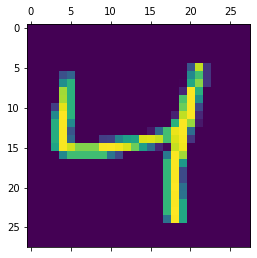

In [ ]:
plt.matshow(xTrain[2])
print("actual number represented by the image = ", yTrain[2]) 

actual number represented by the image =  9


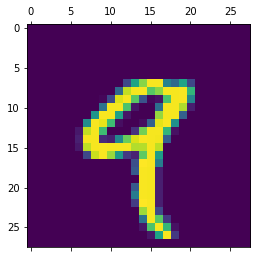

In [ ]:
print("actual number represented by the image = ", yTrain[4]) 
plt.matshow(xTrain[4])

**Data preprocessing: scaling the data by dividing with 255 (bc data varies between 0-255)**

In [37]:
xTrain= xTrain/255
xTest=xTest/255

**Flattening our training/testing dataset to make them a 1D array**



> 


In [38]:
xTrain.shape

(60000, 28, 28)

In [39]:
xTrain_flat = xTrain.reshape(len(xTrain), 28*28)
xTrain_flat.shape

(60000, 784)

In [40]:
xTest_flat = xTest.reshape(len(xTest), 28*28) # flattened dataset 
xTest_flat.shape

(10000, 784)

In [41]:
'''A Sequential model is appropriate for a plain stack of layers 
  where each layer has exactly one input tensor and one output tensor.'''
  
  
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]) 
# dense: every element is connectted to all the elements in the other layer

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xTrain_flat, yTrain, epochs=5)
# epoch = number of iterations that our neural network will run

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4674 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3028 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9255


In [43]:
model.evaluate(xTest_flat,yTest)

313/313 [==============================] - 1s 1ms/step - loss: 0.2680 - accuracy: 0.9257


[0.26800867915153503, 0.9257000088691711]

### **Let's test the model manually:**

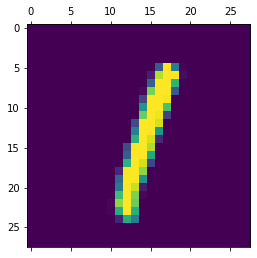

In [45]:
plt.matshow(xTest[5])

In [48]:
yPredicted= model.predict(xTest_flat) #These are the predicted values

In [49]:
yPredicted[5]

array([5.2438761e-05, 9.9694854e-01, 5.1441318e-01, 4.5848113e-01,
       7.0674717e-03, 2.2098958e-02, 1.0091573e-02, 5.2304471e-01,
       5.4019892e-01, 1.5197834e-01], dtype=float32)

-> **These are the scores given by last layer with 10 indexes (0-9)** <br>
-> **(the index with highest value is our prediction)**

In [50]:
# to find the index of highest value out of them we use numpy

np.argmax(yPredicted[5])

1

Correct!

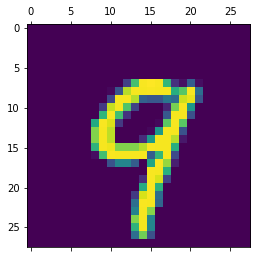

In [56]:
plt.matshow(xTest[12])

In [57]:
np.argmax(yPredicted[12])

9

In [58]:
yTest[12]

9

Correct!